<a href="https://colab.research.google.com/github/davidclizbe/datascience/blob/master/ClizbeMakingPredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this exercise, you'll predict house prices using your model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

Load the housing prices data from Thinkful's database.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

houseprices = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [ ]:
houseprices

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,...,centralair,electrical,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,None,None,None,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,

Split your data into train and test sets.

In [ ]:
houseprices.corr()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
mssubclass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
lotfrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
lotarea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
overallqual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
overallcond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
yearbuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
yearremodadd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
masvnrarea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
bsmtfinsf1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303

In [ ]:
housedata = pd.get_dummies(houseprices, dummy_na=True)
housedata.head()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice,mszoning_C (all),mszoning_FV,...,garagecond_Fa,garagecond_Gd,garagecond_Po,garagecond_TA,garagecond_nan,paveddrive_N,paveddrive_P,paveddrive_Y,paveddrive_nan,poolqc_Ex,poolqc_Fa,poolqc_Gd,poolqc_nan,fence_GdPrv,fence_GdWo,fence_MnPrv,fence_MnWw,fence_nan,miscfeature_Gar2,miscfeature_Othr,miscfeature_Shed,miscfeature_TenC,miscfeature_nan,saletype_COD,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,saletype_nan,salecondition_Abnorml,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial,salecondition_nan
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [ ]:
housedata.dropna(inplace=True)

In [ ]:
y = housedata['saleprice']

X = housedata.drop('saleprice', axis=1)
X.head()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,mszoning_C (all),mszoning_FV,mszoning_RH,...,garagecond_Fa,garagecond_Gd,garagecond_Po,garagecond_TA,garagecond_nan,paveddrive_N,paveddrive_P,paveddrive_Y,paveddrive_nan,poolqc_Ex,poolqc_Fa,poolqc_Gd,poolqc_nan,fence_GdPrv,fence_GdWo,fence_MnPrv,fence_MnWw,fence_nan,miscfeature_Gar2,miscfeature_Othr,miscfeature_Shed,miscfeature_TenC,miscfeature_nan,saletype_COD,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,saletype_nan,salecondition_Abnorml,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial,salecondition_nan
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [ ]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: saleprice, dtype: int64

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.head()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,mszoning_C (all),mszoning_FV,mszoning_RH,...,garagecond_Fa,garagecond_Gd,garagecond_Po,garagecond_TA,garagecond_nan,paveddrive_N,paveddrive_P,paveddrive_Y,paveddrive_nan,poolqc_Ex,poolqc_Fa,poolqc_Gd,poolqc_nan,fence_GdPrv,fence_GdWo,fence_MnPrv,fence_MnWw,fence_nan,miscfeature_Gar2,miscfeature_Othr,miscfeature_Shed,miscfeature_TenC,miscfeature_nan,saletype_COD,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,saletype_nan,salecondition_Abnorml,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial,salecondition_nan
540,541,20,85.0,14601,9,5,2006,2006,584.0,1260,0,578,1838,1838,0,0,1838,1,0,2,0,2,1,8,1,2006.0,3,765,270,68,0,0,0,0,0,3,2009,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
390,390,60,96.0,12474,10,5,2007,2008,272.0,1280,0,402,1682,1742,590,0,2332,1,0,2,1,3,1,9,1,2008.0,3,846,196,134,0,0,0,0,0,8,2008,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
20,21,60,101.0,14215,8,5,2005,2006,380.0,0,0,1158,1158,1158,1218,0,2376,0,0,3,1,4,1,9,1,2005.0,3,853,240,154,0,0,0,0,0,11,2006,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
888,889,20,95.0,15865,8,6,1970,1970,0.0,351,823,1043,2217,2217,0,0,2217,1,0,2,0,4,1,8,1,1970.0,2,621,81,207,0,0,224,0,0,10,2007,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
907,908,50,86.0,11500,7,7,1936,1987,0.0,223,0,794,1017,1020,1037,0,2057,0,0,1,1,3,1,6,1,1936.0,1,180,0,0,0,0,322,0,0,6,2006,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


Estimate your model from the previous checkpoint in the train set. Assess the goodness of fit of your model.

In [ ]:
import statsmodels.api as sm
import numpy as np

model = sm.OLS(y_train,X_train)
results = model.fit()
results.params

id                           1.609478
mssubclass                  40.678408
lotfrontage                 86.066277
lotarea                      1.073709
overallqual               5908.640097
                             ...     
salecondition_Alloca    -22397.713190
salecondition_Family    -33880.575243
salecondition_Normal    -26799.049824
salecondition_Partial   -20168.922077
salecondition_nan            0.000000
Length: 332, dtype: float64

In [ ]:
results.tvalues

id                       0.841076
mssubclass               0.279337
lotfrontage              1.524233
lotarea                  7.207811
overallqual              4.467787
                           ...   
salecondition_Alloca    -0.899114
salecondition_Family    -1.434711
salecondition_Normal    -1.143540
salecondition_Partial   -0.764930
salecondition_nan             NaN
Length: 332, dtype: float64

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     56.79
Date:                Wed, 24 Jun 2020   Prob (F-statistic):               0.00
Time:                        01:56:52   Log-Likelihood:                -10044.
No. Observations:                 896   AIC:                         2.056e+04
Df Residuals:                     661   BIC:                         2.169e+04
Df Model:                         234                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
id                        1.6095      1.914      0.841      0.401      -2.148       5.367
mssubclass               40.6784    145.625      0.279      0.780    -245.265     326.622
lotfrontage              86.0663     56.465      1.524      0.128     -24.807     196.939
lotarea                   1.0737      0.149      7.208      0.000       0.781       1.366
overallqual            5908.6401   1322.498      4.468      0.000    3311.837    8505.444
overallcond            5991.2515   1240.575      4.829      0.000    3555.309    8427.194
yearbuilt               353.6401    101.943      3.469      0.001     153.469     553.811
yearremodadd             53.4922     75.540      0.708      0.479     -94.836     201.820
masvnrarea               26.1865      7.293      3.590      0.000      11.866      40.507
bsmtfinsf1               17.0976      3.702      4.618      0.000       9.828      24.367
bsmtfinsf2               11.1538      7.300      1.528      0.127      -3.181      25.488
bsmtunfsf                -3.7835      3.576     -1.058      0.290     -10.805       3.238
totalbsmtsf              24.4679      5.395      4.535      0.000      13.874      35.061
firstflrsf               16.0668     12.394      1.296      0.195      -8.270      40.404
secondflrsf              40.7981     11.038      3.696      0.000      19.125      62.472
lowqualfinsf            -22.8844     32.608     -0.702      0.483     -86.911      41.142
grlivarea                33.9806     11.951      2.843      0.005      10.513      57.448
bsmtfullbath           -720.0608   2527.022     -0.285      0.776   -5682.019    4241.898
bsmthalfbath            666.4357   3810.362      0.175      0.861   -6815.436    8148.307
fullbath               3758.4610   2817.489      1.334      0.183   -1773.846    9290.768
halfbath                368.7070   2654.524      0.139      0.890   -4843.608    5581.022
bedroomabvgr          -4294.0251   1785.604     -2.405      0.016   -7800.164    -787.886
kitchenabvgr          -1.261e+04   9511.022     -1.325      0.186   -3.13e+04    6069.790
totrmsabvgrd            -15.0582   1219.265     -0.012      0.990   -2409.158    2379.041
fireplaces             2837.6929   3259.823      0.871      0.384   -3563.163    9238.549
garageyrblt              24.1970     77.547      0.312      0.755    -128.071     176.465
garagecars             6808.3523   2701.739      2.520      0.012    1503.327    1.21e+04
garagearea               -0.4018      9.631     -0.042      0.967     -19.314      18.510
wooddecksf               21.0004      7.906      2.656      0.008       5.476      36.525
openporchsf              23.2207     15.280      1.520      0.129      -6.783      53.224
enclosedporch            20.1641     16.330      1.235      0.217     -11.901      52.230
threessnporch          

Predict the house prices in the test set, and evaluate the performance of your model using the metrics we mentioned in this checkpoint.

In [ ]:
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = results.predict(X_test)



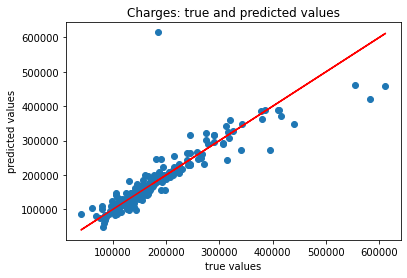

Mean absolute error of the prediction is: 18386.40083625606
Mean squared error of the prediction is: 1555469366.6578054
Root mean squared error of the prediction is: 39439.43922849063
Mean absolute percentage error of the prediction is: 10.682313975088734


In [ ]:
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import rmse, mse
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_pred)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_pred)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_pred)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_pred) / y_test)) * 100))

Is the performance of your model satisfactory? Why?

No. It has too many parameters to be accurate

Try to improve your model in terms of predictive performance by adding or removing some variables.

In [ ]:
housedata = houseprices[['salecondition', 'saleprice', 'yearbuilt' , 'housestyle', 'lotarea', 'lotfrontage']]

In [ ]:
housedata = pd.get_dummies(housedata, dummy_na=True)
housedata.head()

,saleprice,yearbuilt,lotarea,lotfrontage,salecondition_Abnorml,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial,salecondition_nan,housestyle_1.5Fin,housestyle_1.5Unf,housestyle_1Story,housestyle_2.5Fin,housestyle_2.5Unf,housestyle_2Story,housestyle_SFoyer,housestyle_SLvl,housestyle_nan
0,208500,2003,8450,65.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,181500,1976,9600,80.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,223500,2001,11250,68.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,140000,1915,9550,60.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,250000,2000,14260,84.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
housedata.dropna(inplace=True)

In [ ]:
y = housedata['saleprice']

X = housedata.drop('saleprice', axis=1)
X.head()

,yearbuilt,lotarea,lotfrontage,salecondition_Abnorml,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial,salecondition_nan,housestyle_1.5Fin,housestyle_1.5Unf,housestyle_1Story,housestyle_2.5Fin,housestyle_2.5Unf,housestyle_2Story,housestyle_SFoyer,housestyle_SLvl,housestyle_nan
0,2003,8450,65.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,1976,9600,80.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,2001,11250,68.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,1915,9550,60.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,2000,14260,84.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: saleprice, dtype: int64

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.head()

,yearbuilt,lotarea,lotfrontage,salecondition_Abnorml,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial,salecondition_nan,housestyle_1.5Fin,housestyle_1.5Unf,housestyle_1Story,housestyle_2.5Fin,housestyle_2.5Unf,housestyle_2Story,housestyle_SFoyer,housestyle_SLvl,housestyle_nan
601,1937,9000,50.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
837,1973,1680,21.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
45,2005,7658,61.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
197,2007,9416,79.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
586,1918,10267,55.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
import statsmodels.api as sm
import numpy as np

model = sm.OLS(y_train,X_train)
results = model.fit()
results.params

yearbuilt                1.229697e+03
lotarea                  2.095865e+00
lotfrontage              8.158045e+02
salecondition_Abnorml   -1.335291e+06
salecondition_AdjLand   -1.335431e+06
salecondition_Alloca    -1.313440e+06
salecondition_Family    -1.335668e+06
salecondition_Normal    -1.318084e+06
salecondition_Partial   -1.275689e+06
salecondition_nan       -1.910968e-08
housestyle_1.5Fin       -9.937327e+05
housestyle_1.5Unf       -1.013372e+06
housestyle_1Story       -1.017858e+06
housestyle_2.5Fin       -8.905523e+05
housestyle_2.5Unf       -9.427189e+05
housestyle_2Story       -9.834484e+05
housestyle_SFoyer       -1.046381e+06
housestyle_SLvl         -1.025540e+06
housestyle_nan           0.000000e+00
dtype: float64

In [ ]:
results.tvalues

yearbuilt                16.031572
lotarea                   7.966554
lotfrontage               8.725981
salecondition_Abnorml   -15.691593
salecondition_AdjLand   -14.234753
salecondition_Alloca    -15.066914
salecondition_Family    -15.549966
salecondition_Normal    -15.409952
salecondition_Partial   -14.481104
salecondition_nan       -15.444330
housestyle_1.5Fin       -15.684252
housestyle_1.5Unf       -15.549418
housestyle_1Story       -15.466207
housestyle_2.5Fin       -13.755035
housestyle_2.5Unf       -14.562990
housestyle_2Story       -14.850007
housestyle_SFoyer       -15.546711
housestyle_SLvl         -15.370892
housestyle_nan                 NaN
dtype: float64

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     60.23
Date:                Wed, 24 Jun 2020   Prob (F-statistic):          3.00e-126
Time:                        01:56:53   Log-Likelihood:                -11941.
No. Observations:                 960   AIC:                         2.391e+04
Df Residuals:                     944   BIC:                         2.399e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
yearbuilt              1229.6970     76.705     16.032      0.000    1079.166    1380.228
lotarea                   2.0959      0.263      7.967      0.000       1.580       2.612
lotfrontage             815.8045     93.491      8.726      0.000     632.329     999.280
salecondition_Abnorml -1.335e+06   8.51e+04    -15.692      0.000    -1.5e+06   -1.17e+06
salecondition_AdjLand -1.335e+06   9.38e+04    -14.235      0.000   -1.52e+06   -1.15e+06
salecondition_Alloca  -1.313e+06   8.72e+04    -15.067      0.000   -1.48e+06   -1.14e+06
salecondition_Family  -1.336e+06   8.59e+04    -15.550      0.000    -1.5e+06   -1.17e+06
salecondition_Normal  -1.318e+06   8.55e+04    -15.410      0.000   -1.49e+06   -1.15e+06
salecondition_Partial -1.276e+06   8.81e+04    -14.481      0.000   -1.45e+06    -1.1e+06
salecondition_nan     -1.911e-08   1.24e-09    -15.444      0.000   -2.15e-08   -1.67e-08
housestyle_1.5Fin     -9.937e+05   6.34e+04    -15.684      0.000   -1.12e+06   -8.69e+05
housestyle_1.5Unf     -1.013e+06   6.52e+04    -15.549      0.000   -1.14e+06   -8.85e+05
housestyle_1Story     -1.018e+06   6.58e+04    -15.466      0.000   -1.15e+06   -8.89e+05
housestyle_2.5Fin     -8.906e+05   6.47e+04    -13.755      0.000   -1.02e+06   -7.63e+05
housestyle_2.5Unf     -9.427e+05   6.47e+04    -14.563      0.000   -1.07e+06   -8.16e+05
housestyle_2Story     -9.834e+05   6.62e+04    -14.850      0.000   -1.11e+06   -8.53e+05
housestyle_SFoyer     -1.046e+06   6.73e+04    -15.547      0.000   -1.18e+06   -9.14e+05
housestyle_SLvl       -1.026e+06   6.67e+04    -15.371      0.000   -1.16e+06   -8.95e+05
housestyle_nan                 0          0        nan        nan           0           0
==============================================================================
Omnibus:                      447.280   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4488.898
Skew:                           1.873   Prob(JB):                         0.00
Kurtosis:                      12.909   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = results.predict(X_test)

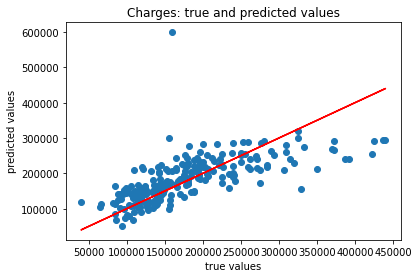

Mean absolute error of the prediction is: 37873.184442994505
Mean squared error of the prediction is: 3153536092.5390677
Root mean squared error of the prediction is: 56156.35398188764
Mean absolute percentage error of the prediction is: 23.074998849447738


In [ ]:
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import rmse, mse
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_pred)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_pred)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_pred)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_pred) / y_test)) * 100))